In [1]:
import random

import numpy as np
import random
import keras
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras import models
from keras import layers
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# number of characters in a word.
# for instance abccba has nb_chars = 6
nb_chars = 4

# number of possible characters used during the encoding.
# for instance abcde leads to 01234 has nb_letters = 5
#nb_letters = 10
nb_letters = 26

# number of words samples to be generated for the training
nb_words = 40000

In [3]:
# total number of combinations
nb_letters**nb_chars

456976

In [4]:
def create_inputs(nb_words, nb_chars, nb_letters):
    '''Create a numpy array of nb_words rows with nb_chars columns each element
    being a random letter of nb_letters (a, b...)'''
    words = np.zeros((nb_words, nb_chars), dtype=int)
    for w in range(nb_words):
        for c in range(nb_chars):
            i = random.randint(0, nb_letters-1)
            words[w, c] = ord('a') + i
    return words


def encrypt(words, nb_words, nb_chars):
    '''Encrypt each element of a numpy array of nb_words rows with nb_chars 
    columns each item with a secret algorithm'''
    
    encrypted_words = words.copy()
    encrypted_words_probs = np.zeros((nb_words, nb_chars, nb_chars))
    
    #val_max = -1
    
    for w in range(nb_words):
        for c in range(nb_chars): # 0,1,2,3,4
            encrypted_words[w,c] = int(words[w,c]) - 49
            val = encrypted_words[w,c] - 48
            
            #if val > val_max:
            #    val_max = val
            
            # add entropy (i.e. mistakes in the encryption)
            #epsilon = random.randint(0, 100)
            #if epsilon == 5 and val != val_max:
            #val +=1
            
            #print('w:',w,', c:',c,', [wc]:', val)
            #encrypted_words_probs[w, c, val ] = 1.0
            encrypted_words[w,c] = val
    return encrypted_words

def print_output(words, nb_words, nb_chars):
    for w in range(nb_words):
        word = ''
        for c in range(nb_chars):
            word += chr(words[w,c])
        print(word)


In [5]:
nb_features = nb_chars

# This returns a tensor
inputs = layers.Input(shape=(nb_chars,), dtype='float32', name='main_input')

# a layer instance is callable on a tensor, and returns a tensor
x = layers.Dense(2048, activation='relu', name='hl_1')(inputs)
#x = layers.Dense(64, activation='relu', name='hl_2')(x)

outputs = []
losses = {}
for o in range(nb_chars):
    name_i = 'output_'+str(o)
    output_i = layers.Dense(nb_letters, activation='softmax', dtype='float32', name=name_i)(x)
    outputs.append(output_i)
    losses[name_i] = 'categorical_crossentropy'

model = keras.models.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='rmsprop',
              loss=losses,
              metrics=['accuracy'])       

In [6]:
print(model.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         (None, 4)            0                                            
__________________________________________________________________________________________________
hl_1 (Dense)                    (None, 2048)         10240       main_input[0][0]                 
__________________________________________________________________________________________________
output_0 (Dense)                (None, 26)           53274       hl_1[0][0]                       
__________________________________________________________________________________________________
output_1 (Dense)                (None, 26)           53274       hl_1[0][0]                       
__________________________________________________________________________________________________
output_2 (

In [7]:
def display_x(x):
    words = []
    for w in x:
        word = ''
        for c in w:
            word += chr(c)
        words.append(word)
   
    print(words)

In [8]:
# ALL IN ONE STEP ('OSSIFIED')

x = create_inputs(nb_words, nb_chars, nb_letters)
display_x(x[:3])
print('x:\n', x[:3], 'out of ',len(x))
print()

# process the x data as useful ANN input data
scaler = StandardScaler()
x_train  = scaler.fit_transform(x)

print('x_train:\n', x_train[:3], 'out of ',len(x_train))
print()

# create output data for training
y = encrypt(x, nb_words, nb_chars)
print('y:\n', y)
print()
# process the y data as useful ANN output data
y_train = keras.utils.to_categorical(y, nb_letters)
print('y_train:\n', y_train[:3], 'out of ',len(y_train))

['mqhb', 'npql', 'nvvu']
x:
 [[109 113 104  98]
 [110 112 113 108]
 [110 118 118 117]] out of  40000

x_train:
 [[-0.06858036  0.46913675 -0.73765968 -1.528045  ]
 [ 0.06500039  0.33595197  0.45856137 -0.19657491]
 [ 0.06500039  1.13506069  1.12312862  1.00174816]] out of  40000

y:
 [[12 16  7  1]
 [13 15 16 11]
 [13 21 21 20]
 ...
 [14 24  9 20]
 [10  9 14  7]
 [15 20 20 16]]

y_train:
 [[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
   0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
   0. 0. 0.]
  [0. 0. 0.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [9]:
def get_sub_sub_set(y, c_ref, nb_chars):
    '''Retrieve the probalities of the i-th char'''
    nb_samples = len(y)
    
    yi = np.zeros((nb_samples, nb_letters), dtype=int)
    
    for s in range(nb_samples):
        for c in range(nb_chars):
            #print('ysl:',y[s][0][l_i])
            if c == c_ref:
                yi[s] = y[s, c]
                
    return yi

In [10]:
y_train2 = []
for c in range(nb_chars):
    yi_train = get_sub_sub_set(y_train, c, nb_chars)
    y_train2.append(yi_train)

In [11]:
y_train2[:3]

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])]

In [12]:
history = model.fit(x_train, y_train2, validation_split=0.90, epochs=1000, batch_size=100,  verbose=1)

Train on 3999 samples, validate on 36001 samples
Epoch 1/1000
3999/3999 [==============================] - 1s 303us/step - loss: 11.3901 - output_0_loss: 2.8460 - output_1_loss: 2.8564 - output_2_loss: 2.8473 - output_3_loss: 2.8404 - output_0_acc: 0.1053 - output_1_acc: 0.1058 - output_2_acc: 0.1210 - output_3_acc: 0.1015 - val_loss: 10.4057 - val_output_0_loss: 2.6031 - val_output_1_loss: 2.6026 - val_output_2_loss: 2.5939 - val_output_3_loss: 2.6061 - val_output_0_acc: 0.1736 - val_output_1_acc: 0.1495 - val_output_2_acc: 0.1398 - val_output_3_acc: 0.1436
Epoch 2/1000
3999/3999 [==============================] - 1s 193us/step - loss: 9.8519 - output_0_loss: 2.4559 - output_1_loss: 2.4723 - output_2_loss: 2.4632 - output_3_loss: 2.4605 - output_0_acc: 0.1850 - output_1_acc: 0.1833 - output_2_acc: 0.1755 - output_3_acc: 0.1788 - val_loss: 9.4889 - val_output_0_loss: 2.3718 - val_output_1_loss: 2.3769 - val_output_2_loss: 2.3706 - val_output_3_loss: 2.3696 - val_output_0_acc: 0.1856 - 

Epoch 17/1000
3999/3999 [==============================] - 1s 174us/step - loss: 5.9941 - output_0_loss: 1.4891 - output_1_loss: 1.5077 - output_2_loss: 1.5016 - output_3_loss: 1.4956 - output_0_acc: 0.4294 - output_1_acc: 0.4109 - output_2_acc: 0.4154 - output_3_acc: 0.4266 - val_loss: 6.1030 - val_output_0_loss: 1.5026 - val_output_1_loss: 1.5262 - val_output_2_loss: 1.5545 - val_output_3_loss: 1.5197 - val_output_0_acc: 0.4326 - val_output_1_acc: 0.4060 - val_output_2_acc: 0.3650 - val_output_3_acc: 0.4197
Epoch 18/1000
3999/3999 [==============================] - 1s 179us/step - loss: 5.8883 - output_0_loss: 1.4531 - output_1_loss: 1.4733 - output_2_loss: 1.4768 - output_3_loss: 1.4851 - output_0_acc: 0.4414 - output_1_acc: 0.4296 - output_2_acc: 0.4279 - output_3_acc: 0.4259 - val_loss: 5.9844 - val_output_0_loss: 1.4816 - val_output_1_loss: 1.4825 - val_output_2_loss: 1.5282 - val_output_3_loss: 1.4921 - val_output_0_acc: 0.4231 - val_output_1_acc: 0.4349 - val_output_2_acc: 0.40

Epoch 33/1000
3999/3999 [==============================] - 1s 175us/step - loss: 4.5694 - output_0_loss: 1.1368 - output_1_loss: 1.1436 - output_2_loss: 1.1511 - output_3_loss: 1.1378 - output_0_acc: 0.5566 - output_1_acc: 0.5561 - output_2_acc: 0.5569 - output_3_acc: 0.5701 - val_loss: 4.7654 - val_output_0_loss: 1.2117 - val_output_1_loss: 1.1746 - val_output_2_loss: 1.1833 - val_output_3_loss: 1.1958 - val_output_0_acc: 0.5192 - val_output_1_acc: 0.5260 - val_output_2_acc: 0.5294 - val_output_3_acc: 0.4881
Epoch 34/1000
3999/3999 [==============================] - 1s 184us/step - loss: 4.5346 - output_0_loss: 1.1218 - output_1_loss: 1.1420 - output_2_loss: 1.1313 - output_3_loss: 1.1396 - output_0_acc: 0.5629 - output_1_acc: 0.5496 - output_2_acc: 0.5606 - output_3_acc: 0.5546 - val_loss: 4.6977 - val_output_0_loss: 1.1699 - val_output_1_loss: 1.1748 - val_output_2_loss: 1.1967 - val_output_3_loss: 1.1562 - val_output_0_acc: 0.5233 - val_output_1_acc: 0.5410 - val_output_2_acc: 0.53

Epoch 49/1000
3999/3999 [==============================] - 1s 178us/step - loss: 3.6979 - output_0_loss: 0.9115 - output_1_loss: 0.9287 - output_2_loss: 0.9297 - output_3_loss: 0.9281 - output_0_acc: 0.6532 - output_1_acc: 0.6427 - output_2_acc: 0.6417 - output_3_acc: 0.6469 - val_loss: 4.0304 - val_output_0_loss: 0.9789 - val_output_1_loss: 1.0015 - val_output_2_loss: 1.0798 - val_output_3_loss: 0.9703 - val_output_0_acc: 0.6159 - val_output_1_acc: 0.5916 - val_output_2_acc: 0.5739 - val_output_3_acc: 0.6115
Epoch 50/1000
3999/3999 [==============================] - 1s 180us/step - loss: 3.6639 - output_0_loss: 0.9013 - output_1_loss: 0.9206 - output_2_loss: 0.9290 - output_3_loss: 0.9130 - output_0_acc: 0.6602 - output_1_acc: 0.6537 - output_2_acc: 0.6439 - output_3_acc: 0.6522 - val_loss: 4.0010 - val_output_0_loss: 1.0013 - val_output_1_loss: 1.0083 - val_output_2_loss: 0.9839 - val_output_3_loss: 1.0074 - val_output_0_acc: 0.5919 - val_output_1_acc: 0.5882 - val_output_2_acc: 0.58

Epoch 65/1000
3999/3999 [==============================] - 1s 172us/step - loss: 3.0379 - output_0_loss: 0.7493 - output_1_loss: 0.7593 - output_2_loss: 0.7622 - output_3_loss: 0.7671 - output_0_acc: 0.7347 - output_1_acc: 0.7289 - output_2_acc: 0.7414 - output_3_acc: 0.7277 - val_loss: 3.3034 - val_output_0_loss: 0.7810 - val_output_1_loss: 0.8655 - val_output_2_loss: 0.8217 - val_output_3_loss: 0.8353 - val_output_0_acc: 0.7413 - val_output_1_acc: 0.6346 - val_output_2_acc: 0.7138 - val_output_3_acc: 0.6302
Epoch 66/1000
3999/3999 [==============================] - 1s 175us/step - loss: 3.0033 - output_0_loss: 0.7417 - output_1_loss: 0.7508 - output_2_loss: 0.7595 - output_3_loss: 0.7512 - output_0_acc: 0.7389 - output_1_acc: 0.7359 - output_2_acc: 0.7204 - output_3_acc: 0.7232 - val_loss: 3.2606 - val_output_0_loss: 0.7736 - val_output_1_loss: 0.8208 - val_output_2_loss: 0.7744 - val_output_3_loss: 0.8918 - val_output_0_acc: 0.7707 - val_output_1_acc: 0.7042 - val_output_2_acc: 0.75

Epoch 81/1000
3999/3999 [==============================] - 1s 174us/step - loss: 2.5255 - output_0_loss: 0.6176 - output_1_loss: 0.6313 - output_2_loss: 0.6369 - output_3_loss: 0.6398 - output_0_acc: 0.8020 - output_1_acc: 0.7997 - output_2_acc: 0.7822 - output_3_acc: 0.7844 - val_loss: 2.8627 - val_output_0_loss: 0.7423 - val_output_1_loss: 0.7325 - val_output_2_loss: 0.7085 - val_output_3_loss: 0.6794 - val_output_0_acc: 0.7176 - val_output_1_acc: 0.6867 - val_output_2_acc: 0.7491 - val_output_3_acc: 0.7514
Epoch 82/1000
3999/3999 [==============================] - 1s 180us/step - loss: 2.4947 - output_0_loss: 0.6142 - output_1_loss: 0.6316 - output_2_loss: 0.6241 - output_3_loss: 0.6249 - output_0_acc: 0.8085 - output_1_acc: 0.7909 - output_2_acc: 0.7954 - output_3_acc: 0.7964 - val_loss: 2.8500 - val_output_0_loss: 0.6819 - val_output_1_loss: 0.6625 - val_output_2_loss: 0.7771 - val_output_3_loss: 0.7284 - val_output_0_acc: 0.8059 - val_output_1_acc: 0.7948 - val_output_2_acc: 0.68

Epoch 97/1000
3999/3999 [==============================] - 1s 173us/step - loss: 2.1081 - output_0_loss: 0.5154 - output_1_loss: 0.5308 - output_2_loss: 0.5235 - output_3_loss: 0.5384 - output_0_acc: 0.8475 - output_1_acc: 0.8435 - output_2_acc: 0.8507 - output_3_acc: 0.8382 - val_loss: 2.3621 - val_output_0_loss: 0.6090 - val_output_1_loss: 0.6227 - val_output_2_loss: 0.5748 - val_output_3_loss: 0.5556 - val_output_0_acc: 0.8034 - val_output_1_acc: 0.8110 - val_output_2_acc: 0.7949 - val_output_3_acc: 0.8538
Epoch 98/1000
3999/3999 [==============================] - 1s 171us/step - loss: 2.0750 - output_0_loss: 0.5042 - output_1_loss: 0.5158 - output_2_loss: 0.5274 - output_3_loss: 0.5277 - output_0_acc: 0.8545 - output_1_acc: 0.8545 - output_2_acc: 0.8335 - output_3_acc: 0.8432 - val_loss: 2.3534 - val_output_0_loss: 0.5861 - val_output_1_loss: 0.5690 - val_output_2_loss: 0.5961 - val_output_3_loss: 0.6022 - val_output_0_acc: 0.8036 - val_output_1_acc: 0.8352 - val_output_2_acc: 0.78

Epoch 113/1000
3999/3999 [==============================] - 1s 175us/step - loss: 1.7488 - output_0_loss: 0.4235 - output_1_loss: 0.4395 - output_2_loss: 0.4368 - output_3_loss: 0.4490 - output_0_acc: 0.8867 - output_1_acc: 0.8825 - output_2_acc: 0.8865 - output_3_acc: 0.8762 - val_loss: 1.9043 - val_output_0_loss: 0.4964 - val_output_1_loss: 0.4921 - val_output_2_loss: 0.4642 - val_output_3_loss: 0.4516 - val_output_0_acc: 0.8447 - val_output_1_acc: 0.8618 - val_output_2_acc: 0.8791 - val_output_3_acc: 0.9254
Epoch 114/1000
3999/3999 [==============================] - 1s 165us/step - loss: 1.7237 - output_0_loss: 0.4171 - output_1_loss: 0.4381 - output_2_loss: 0.4297 - output_3_loss: 0.4387 - output_0_acc: 0.8927 - output_1_acc: 0.8930 - output_2_acc: 0.8900 - output_3_acc: 0.8930 - val_loss: 2.0174 - val_output_0_loss: 0.4942 - val_output_1_loss: 0.5068 - val_output_2_loss: 0.4931 - val_output_3_loss: 0.5233 - val_output_0_acc: 0.8501 - val_output_1_acc: 0.8350 - val_output_2_acc: 0.

Epoch 129/1000
3999/3999 [==============================] - 1s 162us/step - loss: 1.4418 - output_0_loss: 0.3490 - output_1_loss: 0.3639 - output_2_loss: 0.3661 - output_3_loss: 0.3628 - output_0_acc: 0.9292 - output_1_acc: 0.9165 - output_2_acc: 0.9132 - output_3_acc: 0.9195 - val_loss: 1.6013 - val_output_0_loss: 0.4268 - val_output_1_loss: 0.3942 - val_output_2_loss: 0.3785 - val_output_3_loss: 0.4018 - val_output_0_acc: 0.8692 - val_output_1_acc: 0.9203 - val_output_2_acc: 0.9284 - val_output_3_acc: 0.9121
Epoch 130/1000
3999/3999 [==============================] - 1s 161us/step - loss: 1.4292 - output_0_loss: 0.3529 - output_1_loss: 0.3528 - output_2_loss: 0.3589 - output_3_loss: 0.3646 - output_0_acc: 0.9190 - output_1_acc: 0.9250 - output_2_acc: 0.9192 - output_3_acc: 0.9212 - val_loss: 1.6265 - val_output_0_loss: 0.3744 - val_output_1_loss: 0.4455 - val_output_2_loss: 0.4376 - val_output_3_loss: 0.3690 - val_output_0_acc: 0.9332 - val_output_1_acc: 0.8712 - val_output_2_acc: 0.

Epoch 145/1000
3999/3999 [==============================] - 1s 180us/step - loss: 1.1973 - output_0_loss: 0.2951 - output_1_loss: 0.3034 - output_2_loss: 0.3034 - output_3_loss: 0.2953 - output_0_acc: 0.9402 - output_1_acc: 0.9435 - output_2_acc: 0.9342 - output_3_acc: 0.9470 - val_loss: 1.4175 - val_output_0_loss: 0.3777 - val_output_1_loss: 0.4009 - val_output_2_loss: 0.3156 - val_output_3_loss: 0.3232 - val_output_0_acc: 0.8808 - val_output_1_acc: 0.8686 - val_output_2_acc: 0.9408 - val_output_3_acc: 0.9499
Epoch 146/1000
3999/3999 [==============================] - 1s 175us/step - loss: 1.1804 - output_0_loss: 0.2865 - output_1_loss: 0.3023 - output_2_loss: 0.3007 - output_3_loss: 0.2909 - output_0_acc: 0.9457 - output_1_acc: 0.9400 - output_2_acc: 0.9387 - output_3_acc: 0.9517 - val_loss: 1.3594 - val_output_0_loss: 0.3283 - val_output_1_loss: 0.3167 - val_output_2_loss: 0.3363 - val_output_3_loss: 0.3780 - val_output_0_acc: 0.9262 - val_output_1_acc: 0.9499 - val_output_2_acc: 0.

Epoch 161/1000
3999/3999 [==============================] - 1s 169us/step - loss: 0.9714 - output_0_loss: 0.2392 - output_1_loss: 0.2411 - output_2_loss: 0.2414 - output_3_loss: 0.2498 - output_0_acc: 0.9555 - output_1_acc: 0.9572 - output_2_acc: 0.9605 - output_3_acc: 0.9562 - val_loss: 1.1728 - val_output_0_loss: 0.2947 - val_output_1_loss: 0.3138 - val_output_2_loss: 0.2405 - val_output_3_loss: 0.3237 - val_output_0_acc: 0.9209 - val_output_1_acc: 0.9254 - val_output_2_acc: 0.9818 - val_output_3_acc: 0.9120
Epoch 162/1000
3999/3999 [==============================] - 1s 178us/step - loss: 0.9523 - output_0_loss: 0.2329 - output_1_loss: 0.2472 - output_2_loss: 0.2435 - output_3_loss: 0.2288 - output_0_acc: 0.9625 - output_1_acc: 0.9617 - output_2_acc: 0.9572 - output_3_acc: 0.9712 - val_loss: 1.1368 - val_output_0_loss: 0.2659 - val_output_1_loss: 0.3063 - val_output_2_loss: 0.3111 - val_output_3_loss: 0.2535 - val_output_0_acc: 0.9646 - val_output_1_acc: 0.9156 - val_output_2_acc: 0.

Epoch 177/1000
3999/3999 [==============================] - 1s 185us/step - loss: 0.7913 - output_0_loss: 0.1926 - output_1_loss: 0.1972 - output_2_loss: 0.2084 - output_3_loss: 0.1931 - output_0_acc: 0.9740 - output_1_acc: 0.9722 - output_2_acc: 0.9647 - output_3_acc: 0.9762 - val_loss: 1.0165 - val_output_0_loss: 0.2509 - val_output_1_loss: 0.3195 - val_output_2_loss: 0.2077 - val_output_3_loss: 0.2383 - val_output_0_acc: 0.9516 - val_output_1_acc: 0.8812 - val_output_2_acc: 0.9882 - val_output_3_acc: 0.9623
Epoch 178/1000
3999/3999 [==============================] - 1s 178us/step - loss: 0.7586 - output_0_loss: 0.1830 - output_1_loss: 0.1926 - output_2_loss: 0.1909 - output_3_loss: 0.1921 - output_0_acc: 0.9792 - output_1_acc: 0.9720 - output_2_acc: 0.9780 - output_3_acc: 0.9757 - val_loss: 0.9190 - val_output_0_loss: 0.3174 - val_output_1_loss: 0.2291 - val_output_2_loss: 0.1751 - val_output_3_loss: 0.1975 - val_output_0_acc: 0.8988 - val_output_1_acc: 0.9848 - val_output_2_acc: 0.

Epoch 193/1000
3999/3999 [==============================] - 1s 174us/step - loss: 0.6310 - output_0_loss: 0.1529 - output_1_loss: 0.1643 - output_2_loss: 0.1551 - output_3_loss: 0.1587 - output_0_acc: 0.9812 - output_1_acc: 0.9805 - output_2_acc: 0.9827 - output_3_acc: 0.9810 - val_loss: 0.7113 - val_output_0_loss: 0.1843 - val_output_1_loss: 0.2052 - val_output_2_loss: 0.1614 - val_output_3_loss: 0.1604 - val_output_0_acc: 0.9670 - val_output_1_acc: 0.9553 - val_output_2_acc: 0.9916 - val_output_3_acc: 0.9928
Epoch 194/1000
3999/3999 [==============================] - 1s 183us/step - loss: 0.6241 - output_0_loss: 0.1527 - output_1_loss: 0.1592 - output_2_loss: 0.1601 - output_3_loss: 0.1522 - output_0_acc: 0.9792 - output_1_acc: 0.9792 - output_2_acc: 0.9770 - output_3_acc: 0.9870 - val_loss: 0.7552 - val_output_0_loss: 0.2168 - val_output_1_loss: 0.1775 - val_output_2_loss: 0.1562 - val_output_3_loss: 0.2047 - val_output_0_acc: 0.9488 - val_output_1_acc: 0.9848 - val_output_2_acc: 0.

Epoch 209/1000
3999/3999 [==============================] - 1s 165us/step - loss: 0.4980 - output_0_loss: 0.1199 - output_1_loss: 0.1289 - output_2_loss: 0.1273 - output_3_loss: 0.1219 - output_0_acc: 0.9910 - output_1_acc: 0.9852 - output_2_acc: 0.9890 - output_3_acc: 0.9905 - val_loss: 0.5743 - val_output_0_loss: 0.1531 - val_output_1_loss: 0.1291 - val_output_2_loss: 0.1345 - val_output_3_loss: 0.1577 - val_output_0_acc: 0.9837 - val_output_1_acc: 0.9956 - val_output_2_acc: 0.9933 - val_output_3_acc: 0.9868
Epoch 210/1000
3999/3999 [==============================] - 1s 180us/step - loss: 0.4992 - output_0_loss: 0.1247 - output_1_loss: 0.1249 - output_2_loss: 0.1264 - output_3_loss: 0.1232 - output_0_acc: 0.9820 - output_1_acc: 0.9880 - output_2_acc: 0.9855 - output_3_acc: 0.9892 - val_loss: 0.6834 - val_output_0_loss: 0.1939 - val_output_1_loss: 0.1343 - val_output_2_loss: 0.1946 - val_output_3_loss: 0.1606 - val_output_0_acc: 0.9557 - val_output_1_acc: 0.9925 - val_output_2_acc: 0.

Epoch 225/1000
3999/3999 [==============================] - 1s 170us/step - loss: 0.4065 - output_0_loss: 0.0973 - output_1_loss: 0.1027 - output_2_loss: 0.1015 - output_3_loss: 0.1050 - output_0_acc: 0.9907 - output_1_acc: 0.9895 - output_2_acc: 0.9895 - output_3_acc: 0.9912 - val_loss: 0.4910 - val_output_0_loss: 0.1150 - val_output_1_loss: 0.1346 - val_output_2_loss: 0.1347 - val_output_3_loss: 0.1066 - val_output_0_acc: 0.9916 - val_output_1_acc: 0.9850 - val_output_2_acc: 0.9819 - val_output_3_acc: 0.9969
Epoch 226/1000
3999/3999 [==============================] - 1s 185us/step - loss: 0.3961 - output_0_loss: 0.0973 - output_1_loss: 0.0994 - output_2_loss: 0.1036 - output_3_loss: 0.0959 - output_0_acc: 0.9912 - output_1_acc: 0.9932 - output_2_acc: 0.9900 - output_3_acc: 0.9915 - val_loss: 0.5205 - val_output_0_loss: 0.0929 - val_output_1_loss: 0.1601 - val_output_2_loss: 0.1299 - val_output_3_loss: 0.1376 - val_output_0_acc: 0.9978 - val_output_1_acc: 0.9719 - val_output_2_acc: 0.

Epoch 241/1000
3999/3999 [==============================] - 1s 162us/step - loss: 0.3363 - output_0_loss: 0.0838 - output_1_loss: 0.0860 - output_2_loss: 0.0845 - output_3_loss: 0.0820 - output_0_acc: 0.9910 - output_1_acc: 0.9937 - output_2_acc: 0.9907 - output_3_acc: 0.9932 - val_loss: 0.5006 - val_output_0_loss: 0.1222 - val_output_1_loss: 0.0953 - val_output_2_loss: 0.1350 - val_output_3_loss: 0.1481 - val_output_0_acc: 0.9850 - val_output_1_acc: 0.9916 - val_output_2_acc: 0.9636 - val_output_3_acc: 0.9529
Epoch 242/1000
3999/3999 [==============================] - 1s 163us/step - loss: 0.3099 - output_0_loss: 0.0733 - output_1_loss: 0.0791 - output_2_loss: 0.0798 - output_3_loss: 0.0777 - output_0_acc: 0.9950 - output_1_acc: 0.9945 - output_2_acc: 0.9930 - output_3_acc: 0.9952 - val_loss: 0.4082 - val_output_0_loss: 0.0934 - val_output_1_loss: 0.1017 - val_output_2_loss: 0.0729 - val_output_3_loss: 0.1401 - val_output_0_acc: 0.9957 - val_output_1_acc: 0.9963 - val_output_2_acc: 0.

Epoch 257/1000
3999/3999 [==============================] - 1s 185us/step - loss: 0.2577 - output_0_loss: 0.0623 - output_1_loss: 0.0689 - output_2_loss: 0.0654 - output_3_loss: 0.0611 - output_0_acc: 0.9952 - output_1_acc: 0.9940 - output_2_acc: 0.9952 - output_3_acc: 0.9970 - val_loss: 0.3847 - val_output_0_loss: 0.0914 - val_output_1_loss: 0.0987 - val_output_2_loss: 0.1189 - val_output_3_loss: 0.0757 - val_output_0_acc: 0.9866 - val_output_1_acc: 0.9889 - val_output_2_acc: 0.9709 - val_output_3_acc: 0.9944
Epoch 258/1000
3999/3999 [==============================] - 1s 171us/step - loss: 0.2652 - output_0_loss: 0.0642 - output_1_loss: 0.0678 - output_2_loss: 0.0699 - output_3_loss: 0.0633 - output_0_acc: 0.9957 - output_1_acc: 0.9942 - output_2_acc: 0.9925 - output_3_acc: 0.9960 - val_loss: 0.3336 - val_output_0_loss: 0.0625 - val_output_1_loss: 0.0626 - val_output_2_loss: 0.0576 - val_output_3_loss: 0.1509 - val_output_0_acc: 0.9986 - val_output_1_acc: 0.9978 - val_output_2_acc: 0.

Epoch 273/1000
3999/3999 [==============================] - 1s 169us/step - loss: 0.2084 - output_0_loss: 0.0528 - output_1_loss: 0.0509 - output_2_loss: 0.0517 - output_3_loss: 0.0530 - output_0_acc: 0.9970 - output_1_acc: 0.9975 - output_2_acc: 0.9967 - output_3_acc: 0.9962 - val_loss: 0.2898 - val_output_0_loss: 0.0703 - val_output_1_loss: 0.0523 - val_output_2_loss: 0.1107 - val_output_3_loss: 0.0564 - val_output_0_acc: 0.9944 - val_output_1_acc: 0.9995 - val_output_2_acc: 0.9750 - val_output_3_acc: 0.9991
Epoch 274/1000
3999/3999 [==============================] - 1s 167us/step - loss: 0.2048 - output_0_loss: 0.0490 - output_1_loss: 0.0468 - output_2_loss: 0.0553 - output_3_loss: 0.0536 - output_0_acc: 0.9975 - output_1_acc: 0.9985 - output_2_acc: 0.9947 - output_3_acc: 0.9960 - val_loss: 0.2870 - val_output_0_loss: 0.0473 - val_output_1_loss: 0.0941 - val_output_2_loss: 0.0819 - val_output_3_loss: 0.0637 - val_output_0_acc: 0.9997 - val_output_1_acc: 0.9824 - val_output_2_acc: 0.

Epoch 289/1000
3999/3999 [==============================] - 1s 176us/step - loss: 0.1708 - output_0_loss: 0.0455 - output_1_loss: 0.0440 - output_2_loss: 0.0428 - output_3_loss: 0.0385 - output_0_acc: 0.9970 - output_1_acc: 0.9950 - output_2_acc: 0.9970 - output_3_acc: 0.9980 - val_loss: 0.2247 - val_output_0_loss: 0.0845 - val_output_1_loss: 0.0472 - val_output_2_loss: 0.0415 - val_output_3_loss: 0.0516 - val_output_0_acc: 0.9877 - val_output_1_acc: 0.9989 - val_output_2_acc: 0.9996 - val_output_3_acc: 0.9991
Epoch 290/1000
3999/3999 [==============================] - 1s 172us/step - loss: 0.1661 - output_0_loss: 0.0363 - output_1_loss: 0.0404 - output_2_loss: 0.0462 - output_3_loss: 0.0431 - output_0_acc: 0.9995 - output_1_acc: 0.9975 - output_2_acc: 0.9947 - output_3_acc: 0.9972 - val_loss: 0.2524 - val_output_0_loss: 0.0346 - val_output_1_loss: 0.0554 - val_output_2_loss: 0.1008 - val_output_3_loss: 0.0616 - val_output_0_acc: 0.9998 - val_output_1_acc: 0.9937 - val_output_2_acc: 0.

Epoch 305/1000
3999/3999 [==============================] - 1s 184us/step - loss: 0.1318 - output_0_loss: 0.0325 - output_1_loss: 0.0318 - output_2_loss: 0.0324 - output_3_loss: 0.0351 - output_0_acc: 0.9990 - output_1_acc: 0.9982 - output_2_acc: 0.9975 - output_3_acc: 0.9972 - val_loss: 0.1651 - val_output_0_loss: 0.0343 - val_output_1_loss: 0.0279 - val_output_2_loss: 0.0761 - val_output_3_loss: 0.0268 - val_output_0_acc: 0.9998 - val_output_1_acc: 1.0000 - val_output_2_acc: 0.9706 - val_output_3_acc: 0.9997
Epoch 306/1000
3999/3999 [==============================] - 1s 183us/step - loss: 0.1304 - output_0_loss: 0.0333 - output_1_loss: 0.0325 - output_2_loss: 0.0325 - output_3_loss: 0.0321 - output_0_acc: 0.9985 - output_1_acc: 0.9985 - output_2_acc: 0.9970 - output_3_acc: 0.9987 - val_loss: 0.1377 - val_output_0_loss: 0.0435 - val_output_1_loss: 0.0355 - val_output_2_loss: 0.0288 - val_output_3_loss: 0.0299 - val_output_0_acc: 0.9983 - val_output_1_acc: 0.9997 - val_output_2_acc: 1.

Epoch 321/1000
3999/3999 [==============================] - 1s 182us/step - loss: 0.1050 - output_0_loss: 0.0252 - output_1_loss: 0.0244 - output_2_loss: 0.0271 - output_3_loss: 0.0283 - output_0_acc: 0.9990 - output_1_acc: 0.9987 - output_2_acc: 0.9992 - output_3_acc: 0.9977 - val_loss: 0.1630 - val_output_0_loss: 0.0393 - val_output_1_loss: 0.0491 - val_output_2_loss: 0.0262 - val_output_3_loss: 0.0484 - val_output_0_acc: 0.9981 - val_output_1_acc: 0.9942 - val_output_2_acc: 0.9999 - val_output_3_acc: 0.9971
Epoch 322/1000
3999/3999 [==============================] - 1s 173us/step - loss: 0.1089 - output_0_loss: 0.0258 - output_1_loss: 0.0287 - output_2_loss: 0.0285 - output_3_loss: 0.0258 - output_0_acc: 0.9990 - output_1_acc: 0.9982 - output_2_acc: 0.9972 - output_3_acc: 0.9985 - val_loss: 0.1840 - val_output_0_loss: 0.0223 - val_output_1_loss: 0.0546 - val_output_2_loss: 0.0306 - val_output_3_loss: 0.0765 - val_output_0_acc: 1.0000 - val_output_1_acc: 0.9930 - val_output_2_acc: 0.

Epoch 337/1000
3999/3999 [==============================] - 1s 172us/step - loss: 0.0856 - output_0_loss: 0.0217 - output_1_loss: 0.0208 - output_2_loss: 0.0220 - output_3_loss: 0.0211 - output_0_acc: 0.9985 - output_1_acc: 0.9992 - output_2_acc: 0.9992 - output_3_acc: 0.9990 - val_loss: 0.0880 - val_output_0_loss: 0.0202 - val_output_1_loss: 0.0206 - val_output_2_loss: 0.0270 - val_output_3_loss: 0.0201 - val_output_0_acc: 1.0000 - val_output_1_acc: 1.0000 - val_output_2_acc: 0.9993 - val_output_3_acc: 0.9998
Epoch 338/1000
3999/3999 [==============================] - 1s 186us/step - loss: 0.0809 - output_0_loss: 0.0210 - output_1_loss: 0.0208 - output_2_loss: 0.0200 - output_3_loss: 0.0190 - output_0_acc: 0.9985 - output_1_acc: 0.9997 - output_2_acc: 0.9995 - output_3_acc: 0.9990 - val_loss: 0.2007 - val_output_0_loss: 0.0226 - val_output_1_loss: 0.0557 - val_output_2_loss: 0.0439 - val_output_3_loss: 0.0785 - val_output_0_acc: 0.9998 - val_output_1_acc: 0.9884 - val_output_2_acc: 0.

Epoch 353/1000
3999/3999 [==============================] - 1s 192us/step - loss: 0.0697 - output_0_loss: 0.0181 - output_1_loss: 0.0176 - output_2_loss: 0.0180 - output_3_loss: 0.0161 - output_0_acc: 0.9992 - output_1_acc: 0.9990 - output_2_acc: 0.9992 - output_3_acc: 0.9995 - val_loss: 0.0962 - val_output_0_loss: 0.0266 - val_output_1_loss: 0.0201 - val_output_2_loss: 0.0219 - val_output_3_loss: 0.0276 - val_output_0_acc: 0.9982 - val_output_1_acc: 1.0000 - val_output_2_acc: 1.0000 - val_output_3_acc: 0.9984
Epoch 354/1000
3999/3999 [==============================] - 1s 187us/step - loss: 0.0682 - output_0_loss: 0.0155 - output_1_loss: 0.0178 - output_2_loss: 0.0176 - output_3_loss: 0.0173 - output_0_acc: 0.9990 - output_1_acc: 0.9995 - output_2_acc: 0.9987 - output_3_acc: 0.9987 - val_loss: 0.1110 - val_output_0_loss: 0.0439 - val_output_1_loss: 0.0287 - val_output_2_loss: 0.0248 - val_output_3_loss: 0.0135 - val_output_0_acc: 0.9965 - val_output_1_acc: 0.9987 - val_output_2_acc: 0.

Epoch 369/1000
3999/3999 [==============================] - 1s 183us/step - loss: 0.0588 - output_0_loss: 0.0139 - output_1_loss: 0.0155 - output_2_loss: 0.0146 - output_3_loss: 0.0148 - output_0_acc: 0.9995 - output_1_acc: 0.9997 - output_2_acc: 0.9990 - output_3_acc: 0.9997 - val_loss: 0.0973 - val_output_0_loss: 0.0176 - val_output_1_loss: 0.0528 - val_output_2_loss: 0.0106 - val_output_3_loss: 0.0164 - val_output_0_acc: 1.0000 - val_output_1_acc: 0.9870 - val_output_2_acc: 1.0000 - val_output_3_acc: 0.9998
Epoch 370/1000
3999/3999 [==============================] - 1s 176us/step - loss: 0.0554 - output_0_loss: 0.0145 - output_1_loss: 0.0126 - output_2_loss: 0.0160 - output_3_loss: 0.0122 - output_0_acc: 0.9995 - output_1_acc: 0.9992 - output_2_acc: 0.9990 - output_3_acc: 1.0000 - val_loss: 0.0802 - val_output_0_loss: 0.0371 - val_output_1_loss: 0.0117 - val_output_2_loss: 0.0140 - val_output_3_loss: 0.0173 - val_output_0_acc: 0.9942 - val_output_1_acc: 1.0000 - val_output_2_acc: 0.

Epoch 385/1000
3999/3999 [==============================] - 1s 185us/step - loss: 0.0459 - output_0_loss: 0.0102 - output_1_loss: 0.0118 - output_2_loss: 0.0118 - output_3_loss: 0.0122 - output_0_acc: 1.0000 - output_1_acc: 0.9995 - output_2_acc: 0.9997 - output_3_acc: 0.9995 - val_loss: 0.0690 - val_output_0_loss: 0.0269 - val_output_1_loss: 0.0166 - val_output_2_loss: 0.0150 - val_output_3_loss: 0.0106 - val_output_0_acc: 0.9977 - val_output_1_acc: 0.9999 - val_output_2_acc: 1.0000 - val_output_3_acc: 0.9997
Epoch 386/1000
3999/3999 [==============================] - 1s 179us/step - loss: 0.0486 - output_0_loss: 0.0115 - output_1_loss: 0.0126 - output_2_loss: 0.0125 - output_3_loss: 0.0119 - output_0_acc: 0.9997 - output_1_acc: 0.9992 - output_2_acc: 1.0000 - output_3_acc: 0.9997 - val_loss: 0.0352 - val_output_0_loss: 0.0097 - val_output_1_loss: 0.0085 - val_output_2_loss: 0.0080 - val_output_3_loss: 0.0090 - val_output_0_acc: 0.9999 - val_output_1_acc: 1.0000 - val_output_2_acc: 1.

Epoch 401/1000
3999/3999 [==============================] - 1s 187us/step - loss: 0.0411 - output_0_loss: 0.0120 - output_1_loss: 0.0093 - output_2_loss: 0.0096 - output_3_loss: 0.0102 - output_0_acc: 0.9995 - output_1_acc: 1.0000 - output_2_acc: 0.9997 - output_3_acc: 0.9990 - val_loss: 0.0603 - val_output_0_loss: 0.0077 - val_output_1_loss: 0.0214 - val_output_2_loss: 0.0166 - val_output_3_loss: 0.0146 - val_output_0_acc: 0.9999 - val_output_1_acc: 0.9997 - val_output_2_acc: 0.9996 - val_output_3_acc: 1.0000
Epoch 402/1000
3999/3999 [==============================] - 1s 195us/step - loss: 0.0359 - output_0_loss: 0.0097 - output_1_loss: 0.0081 - output_2_loss: 0.0108 - output_3_loss: 0.0072 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 0.9997 - output_3_acc: 1.0000 - val_loss: 0.0409 - val_output_0_loss: 0.0081 - val_output_1_loss: 0.0075 - val_output_2_loss: 0.0118 - val_output_3_loss: 0.0135 - val_output_0_acc: 1.0000 - val_output_1_acc: 1.0000 - val_output_2_acc: 0.

Epoch 417/1000
3999/3999 [==============================] - 1s 169us/step - loss: 0.0332 - output_0_loss: 0.0085 - output_1_loss: 0.0074 - output_2_loss: 0.0091 - output_3_loss: 0.0082 - output_0_acc: 0.9992 - output_1_acc: 1.0000 - output_2_acc: 0.9997 - output_3_acc: 0.9997 - val_loss: 0.0436 - val_output_0_loss: 0.0063 - val_output_1_loss: 0.0220 - val_output_2_loss: 0.0088 - val_output_3_loss: 0.0065 - val_output_0_acc: 1.0000 - val_output_1_acc: 0.9954 - val_output_2_acc: 0.9999 - val_output_3_acc: 0.9999
Epoch 418/1000
3999/3999 [==============================] - 1s 178us/step - loss: 0.0314 - output_0_loss: 0.0074 - output_1_loss: 0.0086 - output_2_loss: 0.0073 - output_3_loss: 0.0081 - output_0_acc: 0.9997 - output_1_acc: 0.9995 - output_2_acc: 1.0000 - output_3_acc: 0.9992 - val_loss: 0.0522 - val_output_0_loss: 0.0150 - val_output_1_loss: 0.0073 - val_output_2_loss: 0.0241 - val_output_3_loss: 0.0058 - val_output_0_acc: 0.9979 - val_output_1_acc: 1.0000 - val_output_2_acc: 0.

Epoch 433/1000
3999/3999 [==============================] - 1s 177us/step - loss: 0.0261 - output_0_loss: 0.0059 - output_1_loss: 0.0074 - output_2_loss: 0.0056 - output_3_loss: 0.0072 - output_0_acc: 1.0000 - output_1_acc: 0.9995 - output_2_acc: 0.9997 - output_3_acc: 0.9997 - val_loss: 0.0812 - val_output_0_loss: 0.0054 - val_output_1_loss: 0.0409 - val_output_2_loss: 0.0059 - val_output_3_loss: 0.0291 - val_output_0_acc: 1.0000 - val_output_1_acc: 0.9941 - val_output_2_acc: 1.0000 - val_output_3_acc: 0.9939
Epoch 434/1000
3999/3999 [==============================] - 1s 171us/step - loss: 0.0273 - output_0_loss: 0.0066 - output_1_loss: 0.0067 - output_2_loss: 0.0077 - output_3_loss: 0.0063 - output_0_acc: 1.0000 - output_1_acc: 0.9997 - output_2_acc: 0.9997 - output_3_acc: 1.0000 - val_loss: 0.0521 - val_output_0_loss: 0.0052 - val_output_1_loss: 0.0119 - val_output_2_loss: 0.0047 - val_output_3_loss: 0.0303 - val_output_0_acc: 1.0000 - val_output_1_acc: 0.9999 - val_output_2_acc: 1.

Epoch 449/1000
3999/3999 [==============================] - 1s 168us/step - loss: 0.0248 - output_0_loss: 0.0055 - output_1_loss: 0.0063 - output_2_loss: 0.0065 - output_3_loss: 0.0065 - output_0_acc: 1.0000 - output_1_acc: 0.9995 - output_2_acc: 1.0000 - output_3_acc: 0.9997 - val_loss: 0.0203 - val_output_0_loss: 0.0039 - val_output_1_loss: 0.0039 - val_output_2_loss: 0.0081 - val_output_3_loss: 0.0044 - val_output_0_acc: 1.0000 - val_output_1_acc: 1.0000 - val_output_2_acc: 1.0000 - val_output_3_acc: 1.0000
Epoch 450/1000
3999/3999 [==============================] - 1s 182us/step - loss: 0.0186 - output_0_loss: 0.0049 - output_1_loss: 0.0043 - output_2_loss: 0.0049 - output_3_loss: 0.0045 - output_0_acc: 0.9995 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 0.0315 - val_output_0_loss: 0.0057 - val_output_1_loss: 0.0096 - val_output_2_loss: 0.0057 - val_output_3_loss: 0.0104 - val_output_0_acc: 0.9999 - val_output_1_acc: 0.9998 - val_output_2_acc: 1.

Epoch 465/1000
3999/3999 [==============================] - 1s 173us/step - loss: 0.0203 - output_0_loss: 0.0050 - output_1_loss: 0.0066 - output_2_loss: 0.0045 - output_3_loss: 0.0043 - output_0_acc: 1.0000 - output_1_acc: 0.9997 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 0.0292 - val_output_0_loss: 0.0049 - val_output_1_loss: 0.0043 - val_output_2_loss: 0.0167 - val_output_3_loss: 0.0032 - val_output_0_acc: 0.9999 - val_output_1_acc: 1.0000 - val_output_2_acc: 0.9952 - val_output_3_acc: 1.0000
Epoch 466/1000
3999/3999 [==============================] - 1s 180us/step - loss: 0.0168 - output_0_loss: 0.0049 - output_1_loss: 0.0039 - output_2_loss: 0.0044 - output_3_loss: 0.0037 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 0.0795 - val_output_0_loss: 0.0171 - val_output_1_loss: 0.0030 - val_output_2_loss: 0.0295 - val_output_3_loss: 0.0299 - val_output_0_acc: 0.9988 - val_output_1_acc: 1.0000 - val_output_2_acc: 0.

Epoch 481/1000
3999/3999 [==============================] - 1s 183us/step - loss: 0.0135 - output_0_loss: 0.0044 - output_1_loss: 0.0022 - output_2_loss: 0.0040 - output_3_loss: 0.0029 - output_0_acc: 0.9997 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 0.0306 - val_output_0_loss: 0.0050 - val_output_1_loss: 0.0112 - val_output_2_loss: 0.0113 - val_output_3_loss: 0.0032 - val_output_0_acc: 1.0000 - val_output_1_acc: 0.9981 - val_output_2_acc: 0.9999 - val_output_3_acc: 0.9998
Epoch 482/1000
3999/3999 [==============================] - 1s 161us/step - loss: 0.0155 - output_0_loss: 0.0047 - output_1_loss: 0.0035 - output_2_loss: 0.0025 - output_3_loss: 0.0048 - output_0_acc: 0.9997 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 0.9997 - val_loss: 0.0126 - val_output_0_loss: 0.0033 - val_output_1_loss: 0.0024 - val_output_2_loss: 0.0036 - val_output_3_loss: 0.0032 - val_output_0_acc: 1.0000 - val_output_1_acc: 1.0000 - val_output_2_acc: 1.

Epoch 497/1000
3999/3999 [==============================] - 1s 168us/step - loss: 0.0117 - output_0_loss: 0.0026 - output_1_loss: 0.0031 - output_2_loss: 0.0026 - output_3_loss: 0.0033 - output_0_acc: 1.0000 - output_1_acc: 0.9997 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 0.0146 - val_output_0_loss: 0.0032 - val_output_1_loss: 0.0070 - val_output_2_loss: 0.0021 - val_output_3_loss: 0.0023 - val_output_0_acc: 0.9999 - val_output_1_acc: 1.0000 - val_output_2_acc: 1.0000 - val_output_3_acc: 1.0000
Epoch 498/1000
3999/3999 [==============================] - 1s 161us/step - loss: 0.0126 - output_0_loss: 0.0033 - output_1_loss: 0.0031 - output_2_loss: 0.0032 - output_3_loss: 0.0030 - output_0_acc: 1.0000 - output_1_acc: 0.9995 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 0.0295 - val_output_0_loss: 0.0037 - val_output_1_loss: 0.0022 - val_output_2_loss: 0.0099 - val_output_3_loss: 0.0137 - val_output_0_acc: 0.9999 - val_output_1_acc: 1.0000 - val_output_2_acc: 0.

Epoch 513/1000
3999/3999 [==============================] - 1s 177us/step - loss: 0.0091 - output_0_loss: 0.0020 - output_1_loss: 0.0019 - output_2_loss: 0.0025 - output_3_loss: 0.0026 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 0.0164 - val_output_0_loss: 0.0109 - val_output_1_loss: 0.0017 - val_output_2_loss: 0.0016 - val_output_3_loss: 0.0021 - val_output_0_acc: 1.0000 - val_output_1_acc: 1.0000 - val_output_2_acc: 1.0000 - val_output_3_acc: 1.0000
Epoch 514/1000
3999/3999 [==============================] - 1s 171us/step - loss: 0.0113 - output_0_loss: 0.0035 - output_1_loss: 0.0025 - output_2_loss: 0.0026 - output_3_loss: 0.0027 - output_0_acc: 0.9997 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 0.0238 - val_output_0_loss: 0.0036 - val_output_1_loss: 0.0163 - val_output_2_loss: 0.0016 - val_output_3_loss: 0.0024 - val_output_0_acc: 1.0000 - val_output_1_acc: 0.9986 - val_output_2_acc: 1.

Epoch 529/1000
3999/3999 [==============================] - 1s 177us/step - loss: 0.0095 - output_0_loss: 0.0030 - output_1_loss: 0.0020 - output_2_loss: 0.0023 - output_3_loss: 0.0022 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 0.0108 - val_output_0_loss: 0.0016 - val_output_1_loss: 0.0052 - val_output_2_loss: 0.0016 - val_output_3_loss: 0.0025 - val_output_0_acc: 1.0000 - val_output_1_acc: 1.0000 - val_output_2_acc: 1.0000 - val_output_3_acc: 1.0000
Epoch 530/1000
3999/3999 [==============================] - 1s 170us/step - loss: 0.0074 - output_0_loss: 0.0021 - output_1_loss: 0.0018 - output_2_loss: 0.0015 - output_3_loss: 0.0020 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 0.0171 - val_output_0_loss: 0.0022 - val_output_1_loss: 0.0060 - val_output_2_loss: 0.0016 - val_output_3_loss: 0.0073 - val_output_0_acc: 1.0000 - val_output_1_acc: 0.9999 - val_output_2_acc: 1.

Epoch 545/1000
3999/3999 [==============================] - 1s 189us/step - loss: 0.0077 - output_0_loss: 0.0025 - output_1_loss: 0.0019 - output_2_loss: 0.0017 - output_3_loss: 0.0016 - output_0_acc: 0.9997 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 0.0077 - val_output_0_loss: 0.0033 - val_output_1_loss: 0.0017 - val_output_2_loss: 0.0011 - val_output_3_loss: 0.0016 - val_output_0_acc: 1.0000 - val_output_1_acc: 1.0000 - val_output_2_acc: 1.0000 - val_output_3_acc: 1.0000
Epoch 546/1000
3999/3999 [==============================] - 1s 174us/step - loss: 0.0070 - output_0_loss: 0.0015 - output_1_loss: 0.0022 - output_2_loss: 0.0018 - output_3_loss: 0.0015 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 0.0064 - val_output_0_loss: 0.0015 - val_output_1_loss: 0.0012 - val_output_2_loss: 0.0011 - val_output_3_loss: 0.0025 - val_output_0_acc: 1.0000 - val_output_1_acc: 1.0000 - val_output_2_acc: 1.

Epoch 561/1000
3999/3999 [==============================] - 1s 179us/step - loss: 0.0062 - output_0_loss: 9.7346e-04 - output_1_loss: 0.0015 - output_2_loss: 0.0015 - output_3_loss: 0.0022 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 0.0047 - val_output_0_loss: 0.0012 - val_output_1_loss: 9.9101e-04 - val_output_2_loss: 0.0012 - val_output_3_loss: 0.0014 - val_output_0_acc: 1.0000 - val_output_1_acc: 1.0000 - val_output_2_acc: 1.0000 - val_output_3_acc: 1.0000
Epoch 562/1000
3999/3999 [==============================] - 1s 173us/step - loss: 0.0062 - output_0_loss: 0.0019 - output_1_loss: 0.0018 - output_2_loss: 0.0016 - output_3_loss: 9.7850e-04 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 0.0052 - val_output_0_loss: 0.0012 - val_output_1_loss: 0.0018 - val_output_2_loss: 0.0012 - val_output_3_loss: 0.0011 - val_output_0_acc: 1.0000 - val_output_1_acc: 1.0000 - val_outp

Epoch 577/1000
3999/3999 [==============================] - 1s 170us/step - loss: 0.0048 - output_0_loss: 0.0014 - output_1_loss: 9.3925e-04 - output_2_loss: 0.0013 - output_3_loss: 0.0011 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 0.0055 - val_output_0_loss: 0.0012 - val_output_1_loss: 0.0011 - val_output_2_loss: 0.0022 - val_output_3_loss: 9.9319e-04 - val_output_0_acc: 1.0000 - val_output_1_acc: 1.0000 - val_output_2_acc: 1.0000 - val_output_3_acc: 1.0000
Epoch 578/1000
3999/3999 [==============================] - 1s 181us/step - loss: 0.0054 - output_0_loss: 0.0013 - output_1_loss: 0.0015 - output_2_loss: 0.0012 - output_3_loss: 0.0015 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 0.0050 - val_output_0_loss: 0.0020 - val_output_1_loss: 0.0011 - val_output_2_loss: 8.8164e-04 - val_output_3_loss: 0.0010 - val_output_0_acc: 0.9999 - val_output_1_acc: 1.0000 - val_outp

Epoch 593/1000
3999/3999 [==============================] - 1s 180us/step - loss: 0.0036 - output_0_loss: 0.0011 - output_1_loss: 6.2995e-04 - output_2_loss: 0.0010 - output_3_loss: 8.2108e-04 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 0.0041 - val_output_0_loss: 0.0016 - val_output_1_loss: 0.0011 - val_output_2_loss: 6.2496e-04 - val_output_3_loss: 7.9504e-04 - val_output_0_acc: 1.0000 - val_output_1_acc: 1.0000 - val_output_2_acc: 1.0000 - val_output_3_acc: 1.0000
Epoch 594/1000
3999/3999 [==============================] - 1s 177us/step - loss: 0.0054 - output_0_loss: 0.0016 - output_1_loss: 0.0015 - output_2_loss: 0.0011 - output_3_loss: 0.0011 - output_0_acc: 0.9997 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 0.0146 - val_output_0_loss: 0.0087 - val_output_1_loss: 8.1658e-04 - val_output_2_loss: 0.0031 - val_output_3_loss: 0.0020 - val_output_0_acc: 0.9998 - val_output_1_acc: 1.0000 - 

3999/3999 [==============================] - 1s 179us/step - loss: 0.0029 - output_0_loss: 8.9695e-04 - output_1_loss: 6.5155e-04 - output_2_loss: 5.7465e-04 - output_3_loss: 8.1351e-04 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 0.0031 - val_output_0_loss: 6.5073e-04 - val_output_1_loss: 8.9966e-04 - val_output_2_loss: 5.5734e-04 - val_output_3_loss: 0.0010 - val_output_0_acc: 1.0000 - val_output_1_acc: 1.0000 - val_output_2_acc: 1.0000 - val_output_3_acc: 1.0000
Epoch 609/1000
3999/3999 [==============================] - 1s 162us/step - loss: 0.0035 - output_0_loss: 9.2557e-04 - output_1_loss: 8.5152e-04 - output_2_loss: 6.6685e-04 - output_3_loss: 0.0010 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 0.0166 - val_output_0_loss: 9.7528e-04 - val_output_1_loss: 7.8350e-04 - val_output_2_loss: 0.0135 - val_output_3_loss: 0.0013 - val_output_0_acc: 1.0000 - val_output_1_a

3999/3999 [==============================] - 1s 182us/step - loss: 0.0031 - output_0_loss: 8.2843e-04 - output_1_loss: 8.8152e-04 - output_2_loss: 8.9271e-04 - output_3_loss: 4.7643e-04 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 0.0039 - val_output_0_loss: 0.0016 - val_output_1_loss: 5.9893e-04 - val_output_2_loss: 4.5901e-04 - val_output_3_loss: 0.0013 - val_output_0_acc: 0.9998 - val_output_1_acc: 1.0000 - val_output_2_acc: 1.0000 - val_output_3_acc: 1.0000
Epoch 624/1000
3999/3999 [==============================] - 1s 176us/step - loss: 0.0030 - output_0_loss: 5.9211e-04 - output_1_loss: 9.8678e-04 - output_2_loss: 7.0225e-04 - output_3_loss: 6.7027e-04 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 0.0057 - val_output_0_loss: 6.0196e-04 - val_output_1_loss: 0.0040 - val_output_2_loss: 5.0149e-04 - val_output_3_loss: 5.3642e-04 - val_output_0_acc: 1.0000 - val_output

3999/3999 [==============================] - 1s 184us/step - loss: 0.0034 - output_0_loss: 6.1068e-04 - output_1_loss: 8.1720e-04 - output_2_loss: 8.0055e-04 - output_3_loss: 0.0011 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 0.9997 - val_loss: 0.0027 - val_output_0_loss: 0.0013 - val_output_1_loss: 4.9113e-04 - val_output_2_loss: 3.8215e-04 - val_output_3_loss: 5.1608e-04 - val_output_0_acc: 1.0000 - val_output_1_acc: 1.0000 - val_output_2_acc: 1.0000 - val_output_3_acc: 1.0000
Epoch 639/1000
3999/3999 [==============================] - 1s 178us/step - loss: 0.0025 - output_0_loss: 8.2396e-04 - output_1_loss: 4.0906e-04 - output_2_loss: 5.9548e-04 - output_3_loss: 6.4947e-04 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 0.0022 - val_output_0_loss: 5.1273e-04 - val_output_1_loss: 7.8618e-04 - val_output_2_loss: 3.9092e-04 - val_output_3_loss: 4.7058e-04 - val_output_0_acc: 1.0000 - val_ou

3999/3999 [==============================] - 1s 176us/step - loss: 0.0018 - output_0_loss: 3.9276e-04 - output_1_loss: 5.3160e-04 - output_2_loss: 5.0563e-04 - output_3_loss: 3.8225e-04 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 0.0029 - val_output_0_loss: 0.0015 - val_output_1_loss: 4.2313e-04 - val_output_2_loss: 6.3760e-04 - val_output_3_loss: 3.7855e-04 - val_output_0_acc: 1.0000 - val_output_1_acc: 1.0000 - val_output_2_acc: 1.0000 - val_output_3_acc: 1.0000
Epoch 654/1000
3999/3999 [==============================] - 1s 165us/step - loss: 0.0021 - output_0_loss: 5.1947e-04 - output_1_loss: 6.7312e-04 - output_2_loss: 4.6837e-04 - output_3_loss: 4.2942e-04 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 0.0074 - val_output_0_loss: 0.0034 - val_output_1_loss: 3.6708e-04 - val_output_2_loss: 2.9964e-04 - val_output_3_loss: 0.0033 - val_output_0_acc: 0.9999 - val_output

3999/3999 [==============================] - 1s 183us/step - loss: 0.0022 - output_0_loss: 2.7096e-04 - output_1_loss: 6.5216e-04 - output_2_loss: 7.3149e-04 - output_3_loss: 5.8370e-04 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 0.0023 - val_output_0_loss: 8.1674e-04 - val_output_1_loss: 3.3561e-04 - val_output_2_loss: 3.3347e-04 - val_output_3_loss: 8.1708e-04 - val_output_0_acc: 1.0000 - val_output_1_acc: 1.0000 - val_output_2_acc: 1.0000 - val_output_3_acc: 1.0000
Epoch 669/1000
3999/3999 [==============================] - 1s 182us/step - loss: 0.0017 - output_0_loss: 5.5974e-04 - output_1_loss: 4.9331e-04 - output_2_loss: 2.3782e-04 - output_3_loss: 3.9998e-04 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 0.0015 - val_output_0_loss: 3.7371e-04 - val_output_1_loss: 4.5846e-04 - val_output_2_loss: 3.2326e-04 - val_output_3_loss: 2.9861e-04 - val_output_0_acc: 1.0000 

3999/3999 [==============================] - 1s 184us/step - loss: 0.0012 - output_0_loss: 2.2998e-04 - output_1_loss: 3.7360e-04 - output_2_loss: 3.3851e-04 - output_3_loss: 2.8211e-04 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 0.0022 - val_output_0_loss: 4.7019e-04 - val_output_1_loss: 2.7516e-04 - val_output_2_loss: 0.0012 - val_output_3_loss: 2.6757e-04 - val_output_0_acc: 1.0000 - val_output_1_acc: 1.0000 - val_output_2_acc: 0.9999 - val_output_3_acc: 1.0000
Epoch 684/1000
3999/3999 [==============================] - 1s 178us/step - loss: 0.0023 - output_0_loss: 5.6171e-04 - output_1_loss: 4.8241e-04 - output_2_loss: 6.3407e-04 - output_3_loss: 6.3766e-04 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 0.0020 - val_output_0_loss: 3.2363e-04 - val_output_1_loss: 8.7686e-04 - val_output_2_loss: 2.4858e-04 - val_output_3_loss: 5.7349e-04 - val_output_0_acc: 1.0000 - va

3999/3999 [==============================] - 1s 167us/step - loss: 0.0014 - output_0_loss: 3.1826e-04 - output_1_loss: 2.9221e-04 - output_2_loss: 3.7394e-04 - output_3_loss: 4.1373e-04 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 0.0049 - val_output_0_loss: 8.5534e-04 - val_output_1_loss: 0.0035 - val_output_2_loss: 3.5329e-04 - val_output_3_loss: 2.3887e-04 - val_output_0_acc: 1.0000 - val_output_1_acc: 1.0000 - val_output_2_acc: 1.0000 - val_output_3_acc: 1.0000
Epoch 699/1000
3999/3999 [==============================] - 1s 168us/step - loss: 0.0012 - output_0_loss: 3.1941e-04 - output_1_loss: 3.3554e-04 - output_2_loss: 2.4157e-04 - output_3_loss: 2.8119e-04 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 0.0061 - val_output_0_loss: 6.0918e-04 - val_output_1_loss: 0.0038 - val_output_2_loss: 3.9774e-04 - val_output_3_loss: 0.0013 - val_output_0_acc: 1.0000 - val_output

3999/3999 [==============================] - 1s 166us/step - loss: 0.0013 - output_0_loss: 3.9587e-04 - output_1_loss: 3.3251e-04 - output_2_loss: 2.5757e-04 - output_3_loss: 3.3701e-04 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 0.0017 - val_output_0_loss: 7.2434e-04 - val_output_1_loss: 5.3030e-04 - val_output_2_loss: 1.7554e-04 - val_output_3_loss: 2.9398e-04 - val_output_0_acc: 1.0000 - val_output_1_acc: 1.0000 - val_output_2_acc: 1.0000 - val_output_3_acc: 1.0000
Epoch 714/1000
3999/3999 [==============================] - 1s 175us/step - loss: 9.7102e-04 - output_0_loss: 1.6638e-04 - output_1_loss: 2.8740e-04 - output_2_loss: 3.1709e-04 - output_3_loss: 2.0015e-04 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 0.0023 - val_output_0_loss: 2.1036e-04 - val_output_1_loss: 2.1452e-04 - val_output_2_loss: 6.9371e-04 - val_output_3_loss: 0.0012 - val_output_0_acc: 1.0000 

Epoch 728/1000
3999/3999 [==============================] - 1s 188us/step - loss: 7.0114e-04 - output_0_loss: 1.3895e-04 - output_1_loss: 1.4149e-04 - output_2_loss: 2.2559e-04 - output_3_loss: 1.9512e-04 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 0.0013 - val_output_0_loss: 1.9999e-04 - val_output_1_loss: 3.9726e-04 - val_output_2_loss: 4.7140e-04 - val_output_3_loss: 2.4606e-04 - val_output_0_acc: 1.0000 - val_output_1_acc: 1.0000 - val_output_2_acc: 1.0000 - val_output_3_acc: 1.0000
Epoch 729/1000
3999/3999 [==============================] - 1s 186us/step - loss: 0.0014 - output_0_loss: 5.7245e-04 - output_1_loss: 3.1392e-04 - output_2_loss: 2.3018e-04 - output_3_loss: 2.3639e-04 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 8.8020e-04 - val_output_0_loss: 2.3485e-04 - val_output_1_loss: 1.6404e-04 - val_output_2_loss: 2.3196e-04 - val_output_3_loss: 2.4935e-04 - va

Epoch 743/1000
3999/3999 [==============================] - 1s 175us/step - loss: 8.7979e-04 - output_0_loss: 1.6867e-04 - output_1_loss: 2.4785e-04 - output_2_loss: 2.2369e-04 - output_3_loss: 2.3958e-04 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 0.0011 - val_output_0_loss: 5.0089e-04 - val_output_1_loss: 2.1408e-04 - val_output_2_loss: 1.1990e-04 - val_output_3_loss: 2.5467e-04 - val_output_0_acc: 1.0000 - val_output_1_acc: 1.0000 - val_output_2_acc: 1.0000 - val_output_3_acc: 1.0000
Epoch 744/1000
3999/3999 [==============================] - 1s 182us/step - loss: 0.0011 - output_0_loss: 5.0302e-04 - output_1_loss: 1.9705e-04 - output_2_loss: 1.9595e-04 - output_3_loss: 1.9125e-04 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 8.0228e-04 - val_output_0_loss: 2.2458e-04 - val_output_1_loss: 2.0489e-04 - val_output_2_loss: 2.0014e-04 - val_output_3_loss: 1.7268e-04 - va

Epoch 758/1000
3999/3999 [==============================] - 1s 171us/step - loss: 0.0010 - output_0_loss: 4.1122e-04 - output_1_loss: 2.1762e-04 - output_2_loss: 2.4501e-04 - output_3_loss: 1.5423e-04 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 8.1385e-04 - val_output_0_loss: 1.6558e-04 - val_output_1_loss: 2.0018e-04 - val_output_2_loss: 1.2203e-04 - val_output_3_loss: 3.2606e-04 - val_output_0_acc: 1.0000 - val_output_1_acc: 1.0000 - val_output_2_acc: 1.0000 - val_output_3_acc: 1.0000
Epoch 759/1000
3999/3999 [==============================] - 1s 172us/step - loss: 6.6537e-04 - output_0_loss: 1.7177e-04 - output_1_loss: 1.6221e-04 - output_2_loss: 2.0287e-04 - output_3_loss: 1.2852e-04 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 9.1685e-04 - val_output_0_loss: 1.6201e-04 - val_output_1_loss: 2.0140e-04 - val_output_2_loss: 2.3061e-04 - val_output_3_loss: 3.2284e-04 

Epoch 773/1000
3999/3999 [==============================] - 1s 174us/step - loss: 6.3088e-04 - output_0_loss: 2.1014e-04 - output_1_loss: 8.8819e-05 - output_2_loss: 8.5933e-05 - output_3_loss: 2.4599e-04 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 0.0013 - val_output_0_loss: 2.8597e-04 - val_output_1_loss: 1.3088e-04 - val_output_2_loss: 6.7139e-04 - val_output_3_loss: 2.3735e-04 - val_output_0_acc: 1.0000 - val_output_1_acc: 1.0000 - val_output_2_acc: 1.0000 - val_output_3_acc: 1.0000
Epoch 774/1000
3999/3999 [==============================] - 1s 170us/step - loss: 7.0650e-04 - output_0_loss: 1.1525e-04 - output_1_loss: 1.3218e-04 - output_2_loss: 1.9302e-04 - output_3_loss: 2.6605e-04 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 0.0024 - val_output_0_loss: 1.8964e-04 - val_output_1_loss: 2.3696e-04 - val_output_2_loss: 3.3074e-04 - val_output_3_loss: 0.0016 - val_ou

Epoch 788/1000
3999/3999 [==============================] - 1s 180us/step - loss: 6.8410e-04 - output_0_loss: 1.6847e-04 - output_1_loss: 2.8522e-04 - output_2_loss: 1.1084e-04 - output_3_loss: 1.1957e-04 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 4.2685e-04 - val_output_0_loss: 1.1036e-04 - val_output_1_loss: 1.3015e-04 - val_output_2_loss: 7.9391e-05 - val_output_3_loss: 1.0695e-04 - val_output_0_acc: 1.0000 - val_output_1_acc: 1.0000 - val_output_2_acc: 1.0000 - val_output_3_acc: 1.0000
Epoch 789/1000
3999/3999 [==============================] - 1s 174us/step - loss: 7.3521e-04 - output_0_loss: 1.8238e-04 - output_1_loss: 9.6110e-05 - output_2_loss: 3.1495e-04 - output_3_loss: 1.4177e-04 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 0.0011 - val_output_0_loss: 1.1228e-04 - val_output_1_loss: 7.1618e-04 - val_output_2_loss: 1.0032e-04 - val_output_3_loss: 1.3837e-04 

Epoch 803/1000
3999/3999 [==============================] - 1s 188us/step - loss: 4.6074e-04 - output_0_loss: 1.2913e-04 - output_1_loss: 1.1914e-04 - output_2_loss: 1.0211e-04 - output_3_loss: 1.1036e-04 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 7.6269e-04 - val_output_0_loss: 9.4522e-05 - val_output_1_loss: 2.1190e-04 - val_output_2_loss: 3.1138e-04 - val_output_3_loss: 1.4489e-04 - val_output_0_acc: 1.0000 - val_output_1_acc: 1.0000 - val_output_2_acc: 1.0000 - val_output_3_acc: 1.0000
Epoch 804/1000
3999/3999 [==============================] - 1s 180us/step - loss: 5.0146e-04 - output_0_loss: 1.3055e-04 - output_1_loss: 9.0519e-05 - output_2_loss: 1.1076e-04 - output_3_loss: 1.6964e-04 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 7.6737e-04 - val_output_0_loss: 4.7981e-04 - val_output_1_loss: 1.0255e-04 - val_output_2_loss: 6.8153e-05 - val_output_3_loss: 1.1686e

Epoch 818/1000
3999/3999 [==============================] - 1s 180us/step - loss: 4.0574e-04 - output_0_loss: 9.6350e-05 - output_1_loss: 9.0564e-05 - output_2_loss: 1.0025e-04 - output_3_loss: 1.1858e-04 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 5.8784e-04 - val_output_0_loss: 8.8843e-05 - val_output_1_loss: 3.6035e-04 - val_output_2_loss: 5.7511e-05 - val_output_3_loss: 8.1142e-05 - val_output_0_acc: 1.0000 - val_output_1_acc: 1.0000 - val_output_2_acc: 1.0000 - val_output_3_acc: 1.0000
Epoch 819/1000
3999/3999 [==============================] - 1s 178us/step - loss: 4.7811e-04 - output_0_loss: 8.8397e-05 - output_1_loss: 1.6353e-04 - output_2_loss: 7.5663e-05 - output_3_loss: 1.5051e-04 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 0.0016 - val_output_0_loss: 1.1735e-04 - val_output_1_loss: 7.7391e-05 - val_output_2_loss: 6.1578e-04 - val_output_3_loss: 7.7518e-04 

Epoch 833/1000
3999/3999 [==============================] - 1s 180us/step - loss: 4.3340e-04 - output_0_loss: 1.3817e-04 - output_1_loss: 6.8337e-05 - output_2_loss: 1.4530e-04 - output_3_loss: 8.1590e-05 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 0.0013 - val_output_0_loss: 1.0793e-04 - val_output_1_loss: 1.2229e-04 - val_output_2_loss: 5.1485e-05 - val_output_3_loss: 0.0010 - val_output_0_acc: 1.0000 - val_output_1_acc: 1.0000 - val_output_2_acc: 1.0000 - val_output_3_acc: 0.9999
Epoch 834/1000
3999/3999 [==============================] - 1s 178us/step - loss: 3.7668e-04 - output_0_loss: 1.6401e-04 - output_1_loss: 9.9893e-05 - output_2_loss: 4.9687e-05 - output_3_loss: 6.3098e-05 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 4.5968e-04 - val_output_0_loss: 2.0256e-04 - val_output_1_loss: 5.5458e-05 - val_output_2_loss: 5.4373e-05 - val_output_3_loss: 1.4730e-04 - va

Epoch 848/1000
3999/3999 [==============================] - 1s 182us/step - loss: 3.3006e-04 - output_0_loss: 1.0780e-04 - output_1_loss: 6.8811e-05 - output_2_loss: 7.3705e-05 - output_3_loss: 7.9740e-05 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 5.5824e-04 - val_output_0_loss: 9.8996e-05 - val_output_1_loss: 3.4328e-04 - val_output_2_loss: 4.8655e-05 - val_output_3_loss: 6.7313e-05 - val_output_0_acc: 1.0000 - val_output_1_acc: 1.0000 - val_output_2_acc: 1.0000 - val_output_3_acc: 1.0000
Epoch 849/1000
3999/3999 [==============================] - 1s 193us/step - loss: 3.5067e-04 - output_0_loss: 9.3508e-05 - output_1_loss: 8.2246e-05 - output_2_loss: 1.0032e-04 - output_3_loss: 7.4596e-05 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 0.0011 - val_output_0_loss: 1.0193e-04 - val_output_1_loss: 6.1404e-05 - val_output_2_loss: 4.0336e-05 - val_output_3_loss: 8.5389e-04 

Epoch 863/1000
3999/3999 [==============================] - 1s 188us/step - loss: 3.2876e-04 - output_0_loss: 1.1400e-04 - output_1_loss: 8.8746e-05 - output_2_loss: 4.6975e-05 - output_3_loss: 7.9041e-05 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 5.5750e-04 - val_output_0_loss: 5.9100e-05 - val_output_1_loss: 6.3211e-05 - val_output_2_loss: 3.7174e-04 - val_output_3_loss: 6.3447e-05 - val_output_0_acc: 1.0000 - val_output_1_acc: 1.0000 - val_output_2_acc: 1.0000 - val_output_3_acc: 1.0000
Epoch 864/1000
3999/3999 [==============================] - 1s 191us/step - loss: 2.6955e-04 - output_0_loss: 5.4468e-05 - output_1_loss: 7.7574e-05 - output_2_loss: 6.9292e-05 - output_3_loss: 6.8212e-05 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 0.0012 - val_output_0_loss: 3.7842e-04 - val_output_1_loss: 8.2789e-05 - val_output_2_loss: 5.0569e-04 - val_output_3_loss: 2.1887e-04 

Epoch 878/1000
3999/3999 [==============================] - 1s 175us/step - loss: 3.2649e-04 - output_0_loss: 7.8900e-05 - output_1_loss: 6.4072e-05 - output_2_loss: 1.1087e-04 - output_3_loss: 7.2649e-05 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 8.0938e-04 - val_output_0_loss: 5.4324e-04 - val_output_1_loss: 7.2531e-05 - val_output_2_loss: 1.1964e-04 - val_output_3_loss: 7.3972e-05 - val_output_0_acc: 1.0000 - val_output_1_acc: 1.0000 - val_output_2_acc: 1.0000 - val_output_3_acc: 1.0000
Epoch 879/1000
3999/3999 [==============================] - 1s 176us/step - loss: 2.7766e-04 - output_0_loss: 1.1866e-04 - output_1_loss: 8.7740e-05 - output_2_loss: 3.9586e-05 - output_3_loss: 3.1673e-05 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 0.0018 - val_output_0_loss: 0.0012 - val_output_1_loss: 2.5618e-04 - val_output_2_loss: 2.6073e-04 - val_output_3_loss: 6.1978e-05 - va

Epoch 893/1000
3999/3999 [==============================] - 1s 180us/step - loss: 2.7021e-04 - output_0_loss: 9.8617e-05 - output_1_loss: 5.1505e-05 - output_2_loss: 7.1195e-05 - output_3_loss: 4.8896e-05 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 2.1462e-04 - val_output_0_loss: 5.9251e-05 - val_output_1_loss: 4.3717e-05 - val_output_2_loss: 4.5360e-05 - val_output_3_loss: 6.6288e-05 - val_output_0_acc: 1.0000 - val_output_1_acc: 1.0000 - val_output_2_acc: 1.0000 - val_output_3_acc: 1.0000
Epoch 894/1000
3999/3999 [==============================] - 1s 188us/step - loss: 1.6231e-04 - output_0_loss: 3.1818e-05 - output_1_loss: 4.8482e-05 - output_2_loss: 4.3504e-05 - output_3_loss: 3.8506e-05 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 2.8449e-04 - val_output_0_loss: 4.4757e-05 - val_output_1_loss: 4.6051e-05 - val_output_2_loss: 3.2281e-05 - val_output_3_loss: 1.6140e

Epoch 908/1000
3999/3999 [==============================] - 1s 181us/step - loss: 1.5529e-04 - output_0_loss: 2.8348e-05 - output_1_loss: 3.9092e-05 - output_2_loss: 3.6055e-05 - output_3_loss: 5.1792e-05 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 2.6859e-04 - val_output_0_loss: 1.3868e-04 - val_output_1_loss: 4.5831e-05 - val_output_2_loss: 2.7826e-05 - val_output_3_loss: 5.6257e-05 - val_output_0_acc: 1.0000 - val_output_1_acc: 1.0000 - val_output_2_acc: 1.0000 - val_output_3_acc: 1.0000
Epoch 909/1000
3999/3999 [==============================] - 1s 179us/step - loss: 2.4079e-04 - output_0_loss: 1.0671e-04 - output_1_loss: 6.6772e-05 - output_2_loss: 4.0453e-05 - output_3_loss: 2.6852e-05 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 1.5877e-04 - val_output_0_loss: 6.0897e-05 - val_output_1_loss: 3.6869e-05 - val_output_2_loss: 2.5847e-05 - val_output_3_loss: 3.5155e

Epoch 923/1000
3999/3999 [==============================] - 1s 181us/step - loss: 1.1584e-04 - output_0_loss: 2.5968e-05 - output_1_loss: 3.0058e-05 - output_2_loss: 3.5943e-05 - output_3_loss: 2.3872e-05 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 3.9312e-04 - val_output_0_loss: 1.9827e-04 - val_output_1_loss: 3.7187e-05 - val_output_2_loss: 2.7128e-05 - val_output_3_loss: 1.3053e-04 - val_output_0_acc: 1.0000 - val_output_1_acc: 1.0000 - val_output_2_acc: 1.0000 - val_output_3_acc: 1.0000
Epoch 924/1000
3999/3999 [==============================] - 1s 171us/step - loss: 3.0911e-04 - output_0_loss: 1.2248e-04 - output_1_loss: 3.0588e-05 - output_2_loss: 7.5720e-05 - output_3_loss: 8.0323e-05 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 1.6813e-04 - val_output_0_loss: 5.0706e-05 - val_output_1_loss: 2.8005e-05 - val_output_2_loss: 4.1742e-05 - val_output_3_loss: 4.7681e

Epoch 938/1000
3999/3999 [==============================] - 1s 187us/step - loss: 1.9658e-04 - output_0_loss: 7.6437e-05 - output_1_loss: 5.9415e-05 - output_2_loss: 3.5140e-05 - output_3_loss: 2.5592e-05 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 0.0016 - val_output_0_loss: 9.8414e-05 - val_output_1_loss: 3.1764e-05 - val_output_2_loss: 2.0722e-05 - val_output_3_loss: 0.0014 - val_output_0_acc: 1.0000 - val_output_1_acc: 1.0000 - val_output_2_acc: 1.0000 - val_output_3_acc: 0.9996
Epoch 939/1000
3999/3999 [==============================] - 1s 185us/step - loss: 8.7497e-05 - output_0_loss: 1.8145e-05 - output_1_loss: 1.1024e-05 - output_2_loss: 2.9755e-05 - output_3_loss: 2.8573e-05 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 2.3996e-04 - val_output_0_loss: 1.2177e-04 - val_output_1_loss: 2.0862e-05 - val_output_2_loss: 1.6962e-05 - val_output_3_loss: 8.0369e-05 - va

Epoch 953/1000
3999/3999 [==============================] - 1s 163us/step - loss: 1.4915e-04 - output_0_loss: 4.3586e-05 - output_1_loss: 4.1804e-05 - output_2_loss: 4.2247e-05 - output_3_loss: 2.1515e-05 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 1.4466e-04 - val_output_0_loss: 7.1715e-05 - val_output_1_loss: 2.5092e-05 - val_output_2_loss: 1.7610e-05 - val_output_3_loss: 3.0248e-05 - val_output_0_acc: 1.0000 - val_output_1_acc: 1.0000 - val_output_2_acc: 1.0000 - val_output_3_acc: 1.0000
Epoch 954/1000
3999/3999 [==============================] - 1s 167us/step - loss: 1.9871e-04 - output_0_loss: 2.3665e-05 - output_1_loss: 4.1600e-05 - output_2_loss: 2.4028e-05 - output_3_loss: 1.0941e-04 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 1.9476e-04 - val_output_0_loss: 3.8457e-05 - val_output_1_loss: 2.7490e-05 - val_output_2_loss: 2.3229e-05 - val_output_3_loss: 1.0558e

Epoch 968/1000
3999/3999 [==============================] - 1s 185us/step - loss: 1.1628e-04 - output_0_loss: 3.7091e-05 - output_1_loss: 5.2532e-05 - output_2_loss: 1.5747e-05 - output_3_loss: 1.0910e-05 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 2.4480e-04 - val_output_0_loss: 3.8272e-05 - val_output_1_loss: 2.2788e-05 - val_output_2_loss: 2.5212e-05 - val_output_3_loss: 1.5852e-04 - val_output_0_acc: 1.0000 - val_output_1_acc: 1.0000 - val_output_2_acc: 1.0000 - val_output_3_acc: 0.9999
Epoch 969/1000
3999/3999 [==============================] - 1s 167us/step - loss: 1.0427e-04 - output_0_loss: 2.6349e-05 - output_1_loss: 1.1972e-05 - output_2_loss: 1.6359e-05 - output_3_loss: 4.9585e-05 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 3.2699e-04 - val_output_0_loss: 2.2536e-05 - val_output_1_loss: 7.5828e-05 - val_output_2_loss: 5.4690e-05 - val_output_3_loss: 1.7393e

Epoch 983/1000
3999/3999 [==============================] - 1s 179us/step - loss: 8.9885e-05 - output_0_loss: 2.4638e-05 - output_1_loss: 3.7045e-05 - output_2_loss: 8.7827e-06 - output_3_loss: 1.9419e-05 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 1.2494e-04 - val_output_0_loss: 3.4544e-05 - val_output_1_loss: 4.0083e-05 - val_output_2_loss: 2.6398e-05 - val_output_3_loss: 2.3918e-05 - val_output_0_acc: 1.0000 - val_output_1_acc: 1.0000 - val_output_2_acc: 1.0000 - val_output_3_acc: 1.0000
Epoch 984/1000
3999/3999 [==============================] - 1s 185us/step - loss: 1.0975e-04 - output_0_loss: 2.7584e-05 - output_1_loss: 1.3617e-05 - output_2_loss: 4.7393e-05 - output_3_loss: 2.1156e-05 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 8.9145e-04 - val_output_0_loss: 1.3603e-04 - val_output_1_loss: 3.8348e-05 - val_output_2_loss: 1.4954e-05 - val_output_3_loss: 7.0212e

Epoch 998/1000
3999/3999 [==============================] - 1s 188us/step - loss: 5.4500e-05 - output_0_loss: 1.1080e-05 - output_1_loss: 7.7278e-06 - output_2_loss: 2.4141e-05 - output_3_loss: 1.1551e-05 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 3.1704e-04 - val_output_0_loss: 1.7102e-05 - val_output_1_loss: 1.5924e-05 - val_output_2_loss: 1.6096e-05 - val_output_3_loss: 2.6792e-04 - val_output_0_acc: 1.0000 - val_output_1_acc: 1.0000 - val_output_2_acc: 1.0000 - val_output_3_acc: 1.0000
Epoch 999/1000
3999/3999 [==============================] - 1s 175us/step - loss: 1.7987e-04 - output_0_loss: 9.8948e-05 - output_1_loss: 4.5777e-05 - output_2_loss: 2.2458e-05 - output_3_loss: 1.2690e-05 - output_0_acc: 1.0000 - output_1_acc: 1.0000 - output_2_acc: 1.0000 - output_3_acc: 1.0000 - val_loss: 2.8426e-04 - val_output_0_loss: 1.2768e-04 - val_output_1_loss: 2.3170e-05 - val_output_2_loss: 8.3647e-05 - val_output_3_loss: 4.9767e

In [13]:
def print_readable_prediction(prediction, nb_words):
    
    words = [''] * nb_words
    
    c_i = 0
    for char_prediction in prediction:

        s_i = 0
        for sample_char_prediction in char_prediction:

            i_letter = 0
            best_value = -float('inf')
            best_letter = -1
            for letter_prediction in sample_char_prediction:
                if letter_prediction > best_value:
                    best_value = letter_prediction
                    best_letter = i_letter
                i_letter += 1
            words[s_i] += str(best_letter)
            words[s_i] += '-'
            s_i += 1
        c_i += 1
    print(words)

In [14]:
nb_words = 2

x_test = create_inputs(nb_words, nb_chars, nb_letters)
display_x(x_test)
print("x_test=\n", x_test)

x_test_n  = scaler.transform(x_test)
print("x_test_mean=\n", x_test_n)
print('-->')

prediction = model.predict(x_test_n)
#print(prediction)
print('prediction')
print_readable_prediction(prediction, nb_words)

print('check prediction')
y_test = encrypt(x_test, nb_words, nb_chars)
print("y_test=\n", y_test)

['rcab', 'zqry']
x_test=
 [[114  99  97  98]
 [122 113 114 121]]
x_test_mean=
 [[ 0.5993234  -1.39545026 -1.66805382 -1.528045  ]
 [ 1.66796941  0.46913675  0.59147482  1.53433619]]
-->
prediction
['17-2-0-1-', '25-16-17-24-']
check prediction
y_test=
 [[17  2  0  1]
 [25 16 17 24]]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


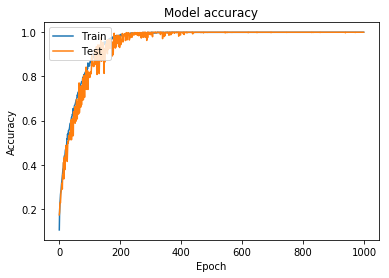

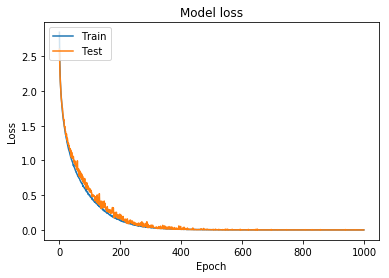

In [15]:
# Plot training & validation accuracy values (of first char only)
plt.plot(history.history['output_0_acc'])
plt.plot(history.history['val_output_0_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Plot training & validation loss values (of first char only)
plt.plot(history.history['output_0_loss'])
plt.plot(history.history['val_output_0_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()